In [177]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot
import nltk

In [178]:
df = pd.read_csv('file_categories.csv').drop('Unnamed: 0',axis=1)

# EDA

### 

In [179]:
def get_ext(df):
    target = "\.[^\.]+$"
    name = df['0']
    filenames=[]
    exts=[]
    for i in range(len(name)):
        if re.search(target,name[i]) is None:
            ext = 0
        else:
            ext = re.search(target, name[i]).group()
        filename = re.split(target, name[i])[0]
        #print(ext)
        exts.append(ext)
        filenames.append(filename)
    df['filename'] = filenames
    df['ext'] = exts
    return df.drop('0',axis=1)

In [180]:
data = get_ext(df)
data

,category,filename,ext
0,0,desktop,.ini
1,0,Inkscape,.lnk
2,0,Carla Hegeman Crim - Essential Sewing Referenc...,.epub
3,0,car,.jpg
4,0,NEEDLES,.png
...,...,...,...
51837,6,pack-e19e9158e5190e5ec72a5ccd2af2b12506c17679,.idx
51838,6,pack-e19e9158e5190e5ec72a5ccd2af2b12506c17679,.pack
51839,6,pack-e19e9158e5190e5ec72a5ccd2af2b12506c17679,.rev
51840,6,main,0


In [181]:
data.isna().sum()

category    0
filename    0
ext         0
dtype: int64

<Axes: xlabel='category'>

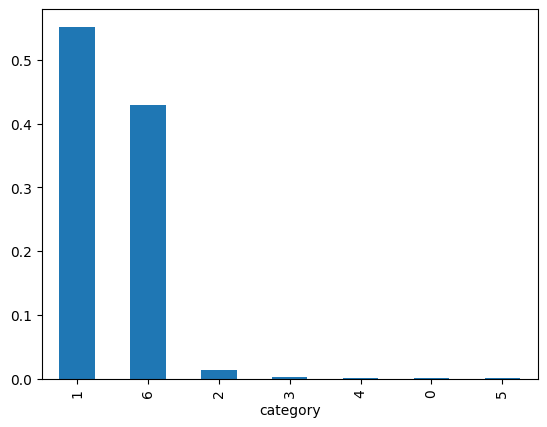

In [182]:
data['category'].value_counts(normalize = True).plot.bar()

In [183]:
data['ext'].value_counts()

ext
.png          15403
.json         12346
.js            5762
.pyc           2779
.py            2759
              ...  
.tiff             1
.icns             1
.modulemap        1
.bak              1
.bnf              1
Name: count, Length: 178, dtype: int64

### Preproc

In [184]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\dskon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\dskon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\dskon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\dskon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\dskon\AppData\Roaming\nltk_data...
[

True

In [185]:

#filename preproc, removing special characters, lemmatizing, 
text = list(data['filename'])

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []


for i in range(len(text)):
    r = re.sub('[^a-zA-Z0-9]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)
    
data['filename'] = corpus

#onehot encoding file extensions

one_hot = pd.get_dummies(data['ext'])
data_t = pd.concat([data,one_hot],axis=1)
data_t = data_t.drop('ext',axis=1)

In [186]:
data_t

,category,filename,0,.1,.3,.6,.8,.8-config,.APACHE,.APACHE2,...,.webm,.webmanifest,.webp,.xlsx,.xml,.xsl,.y,.yml,.zi,.zip
0,0,desktop,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,inkscape,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,carla hegeman crim essential sewing reference ...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,car,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,needle,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51837,6,pack e19e9158e5190e5ec72a5ccd2af2b12506c17679,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51838,6,pack e19e9158e5190e5ec72a5ccd2af2b12506c17679,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51839,6,pack e19e9158e5190e5ec72a5ccd2af2b12506c17679,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51840,6,main,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## LSA approach for filename

In [203]:
from sklearn.model_selection import train_test_split


X = data_t.drop('category',axis=1)
y = data_t['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (34734, 179)
Testing Data :  (17108, 179)


In [211]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X_train_vec = vectorizer.fit_transform(X_train.filename)

X_train_vec.shape # check shape of the document-term matrix



(34734, 1000)

In [212]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=7, algorithm='randomized', n_iter=100, random_state=122)

X_train_svd = svd_model.fit_transform(X_train_vec)

len(svd_model.components_)


7

In [215]:
"""
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")"""


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_svd, y_train)

LogisticRegression()

In [216]:
X_test_vec = vectorizer.fit_transform(X_test.filename)
X_test_svd = svd_model.fit_transform(X_test_vec)

predictions = lr.predict(X_test_svd)

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=range(7), columns=range(7))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.59      0.96      0.73      9384
           2       0.00      0.00      0.00       233
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        16
           6       0.80      0.20      0.31      7390

    accuracy                           0.61     17108
   macro avg       0.20      0.17      0.15     17108
weighted avg       0.67      0.61      0.54     17108



C:\Users\dskon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dskon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dskon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## BOW approach

In [217]:
from sklearn.model_selection import train_test_split


X = data_t.drop('category',axis=1)
y = data_t['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train['filename'])

X_train_cv.shape

Training Data : (34734, 179)
Testing Data :  (17108, 179)


(34734, 9443)

In [218]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

LogisticRegression()

In [219]:
X_test_cv = cv.transform(X_test['filename'])

predictions = lr.predict(X_test_cv)

In [220]:
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=range(7), columns=range(7))
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.99      0.93      0.96      9384
           2       0.83      0.15      0.25       233
           3       1.00      0.13      0.24        45
           4       1.00      0.12      0.21        25
           5       0.00      0.00      0.00        16
           6       0.88      0.99      0.93      7390

    accuracy                           0.94     17108
   macro avg       0.82      0.43      0.48     17108
weighted avg       0.94      0.94      0.93     17108



C:\Users\dskon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dskon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dskon\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
